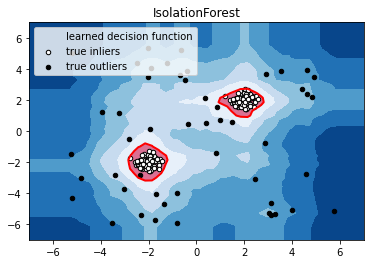

In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy import stats
 
rng = np.random.RandomState(42) #获的随机数生成器
 
# 构造训练样本
n_samples = 200  #样本总数
outliers_fraction = 0.25  #异常样本比例
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
 
X = 0.3 * rng.randn(n_inliers // 2, 2) #rng.randn(m, n) 产生m行n列的数组
X_train = np.r_[X + 2, X - 2]   #正常样本 r_[X + 2, X - 2] 将两个矩阵 上下想加
# numpy.random.uniform(low,high,size)
# 从一个均匀分布[low,high)中随机采样
X_train = np.r_[X_train, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]  #正常样本加上异常样本
 
# fit the model
clf = IsolationForest(max_samples=n_samples, random_state=rng, contamination=outliers_fraction)
clf.fit(X_train)
# y_pred_train = clf.predict(X_train)
scores_pred = clf.decision_function(X_train)
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)  #根据训练样本中异常样本比例，得到阈值，用于绘图
 
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-7, 7, 50), np.linspace(-7, 7, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
plt.title("IsolationForest")
# plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Blues_r)  #绘制异常点区域，值从最小的到阈值的那部分
a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')  #绘制异常点区域和正常点区域的边界
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='palevioletred')  #绘制正常点区域，值从阈值到最大的那部分
 
b = plt.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',
                    s=20, edgecolor='k')
c = plt.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',
                    s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'true inliers', 'true outliers'],
           loc="upper left")
plt.show()

参考示例：https://zhuanlan.zhihu.com/p/518228986

数据源下载地址：https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [3]:
data=pd.read_csv('./data/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

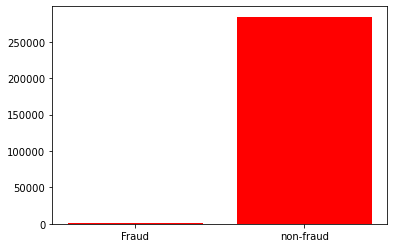

In [6]:
from turtle import color


num_nonfraud=np.sum(data['Class']==0)
num_fraud=np.sum(data['Class']==1)
plt.bar(['Fraud','non-fraud'],[num_fraud,num_nonfraud],color='red')
plt.show()

In [7]:
data['Hour']=data['Time'].apply(lambda x:divmod(x,3600)[0])
X=data.drop(["Time",'Class'],axis=1)
Y=data.Class

In [11]:
iforest=IsolationForest()
X=iforest.fit_predict(X)
data['scores']=iforest.decision_function(X)

In [12]:
# 查看参数
iforest.get_params()

{'bootstrap': False,
 'contamination': 'auto',
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}